# 1. Initalize Script

If you're running this script on Google Colab<br>
Mount your Google drive: 
1. Click on the folder icon on the left
2. Click Mount Drive
3. The root directory would be /content/
```
# your Google Drive folder would be at:
/content/drive/My Drive/
```

Change working directory:<br>
1. Run this command:
```
%cd /content/drive/My Drive/<your folder>
```

In [32]:
%cd /content/drive/My Drive/Data Science/Constantly-Learning

/content/drive/My Drive/Data Science/Constantly-Learning


# Load And conduct EDA

In [33]:
import pandas as pd

def load_data(filename):
    return pd.read_csv(filename)

data = load_data('Titanic/train.csv')

In [34]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


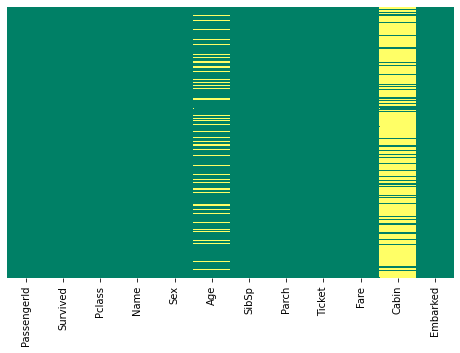

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.subplots(figsize=(8,5))
sns.heatmap(
    data.isnull(),
    yticklabels=False,
    cbar=False,
    cmap='summer'
)
plt.show()

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From above,<br>
Following columns have missing fields:
1. Age
2. Cabin
3. Embarked

In [37]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Barbara, Miss. Saiide",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# Pre-process Data

## Fill missing Cabin values

In [38]:
def cabin_split(data, string_format='cabinLevel cabinRoom'):
    data.loc[data['Cabin'].isna(), 'Cabin'] = 'Z-1'
    data[string_format.split()] = data['Cabin'].apply(
        lambda string: pd.Series(
            (string[0], string[1:]),
            index=string_format.split()
        )
    )
    return data

(
    load_data('Titanic/train.csv')
    .pipe(cabin_split)
).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabinLevel,cabinRoom
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Z-1,S,Z,-1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Z-1,S,Z,-1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Z-1,S,Z,-1


## Split Name to first and second

In [39]:
import pandas as pd
def split_name(data, col_name='Name', name_format='lastName firstName'):
    data[name_format.split()] = data[col_name].apply(
        lambda string: pd.Series(
            (string.split(', ')),
            index=name_format.split()
        )
    )
    return data.drop(columns=[col_name])

(
    load_data('Titanic/train.csv')
    .pipe(split_name)
).head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastName,firstName
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


## Fill missing age values

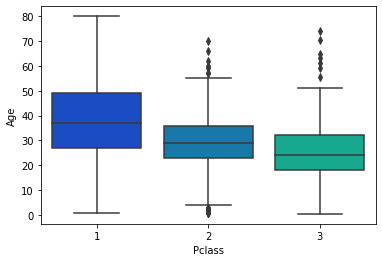

In [40]:
import seaborn as sns
sns.boxplot(
    x='Pclass',
    y='Age',
    data=data,
    palette='winter'
)

In [41]:
def fill_na(data, fill_col, map_col):
    map_col = [map_col] if isinstance(map_col, str) else (map_col if isinstance(map_col, list) else print('error'))
    cond = data[fill_col].isna()
    cond_map = data[[fill_col]+map_col].groupby(map_col).mean().to_dict('index')
    data.loc[cond, fill_col] = list(map(
        lambda conds: cond_map.get(tuple(conds))[fill_col], 
        data.loc[cond, map_col].values
    ))

    return data
    
data = (
    load_data('Titanic/train.csv')
    .pipe(fill_na, 'Age', ['Pclass', 'Sex'])
)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Binning Continous data

In [42]:
def binning(data, col_name, bins_splits, labels): # One hot encoding for continous type data
    data[col_name+'_bin'] = pd.cut(
        data[col_name], 
        bins=[min(data['Age'])]+bins_splits+[max(data['Age'])], 
        labels=labels
    )
    return data

(
    load_data('Titanic/train.csv')
    .pipe(fill_na, 'Age', ['Pclass', 'Sex'])
    .pipe(binning, 'Age', [13, 19, 61], ['<12', 'Teen', 'Adult', 'Elder'])
).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


## Alone?

In [43]:
def alone(data):
    data['Alone'] = data[['SibSp', 'Parch']].apply(lambda row: 'No' if (row['SibSp']+row['Parch'])>0 else 'Yes', axis=1)
    return data

data = (
    load_data('Titanic/train.csv')
    .pipe(alone)
)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,No
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,No
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Yes


# Data Analysis

In [44]:
data = (
    load_data('Titanic/train.csv')
    .pipe(split_name)
    .pipe(fill_na, 'Age', ['Pclass', 'Sex'])
    .pipe(binning, 'Age', [13, 19, 61], ['<12', 'Teen', 'Adult', 'Elder'])
    .pipe(cabin_split)
    .pipe(alone)
)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastName,firstName,Age_bin,cabinLevel,cabinRoom,Alone
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,Z-1,S,Braund,Mr. Owen Harris,Adult,Z,-1,No
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,C,85,No
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,Z-1,S,Heikkinen,Miss. Laina,Adult,Z,-1,Yes
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,C,123,No
4,5,0,3,male,35.0,0,0,373450,8.0500,Z-1,S,Allen,Mr. William Henry,Adult,Z,-1,Yes


## Male/Female

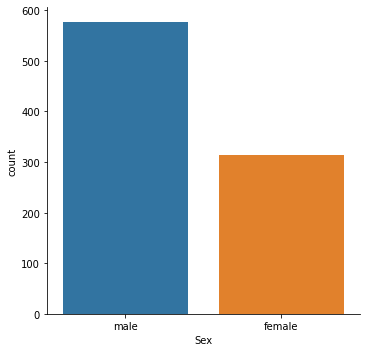

In [45]:
import seaborn as sns
sns.catplot('Sex', data=data, kind='count')

## Passenger Class vs Male/Female

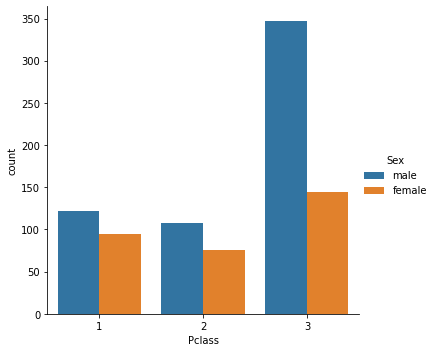

In [46]:
import seaborn as sns
sns.catplot('Pclass', data=data, hue='Sex', kind='count')

## Passenger Class vs Age Group

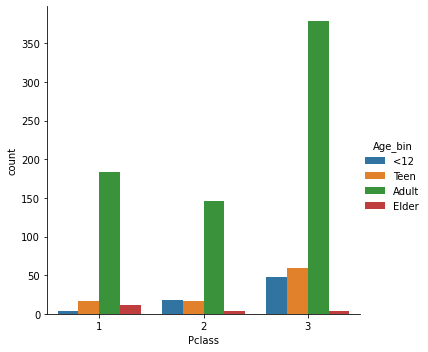

In [47]:
import seaborn as sns
sns.catplot('Pclass', data=data, hue='Age_bin', kind='count')

## Age Distribution

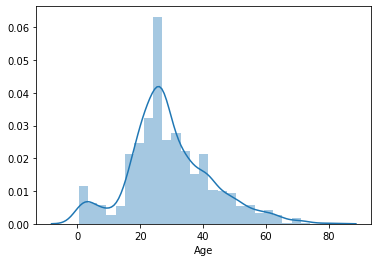

In [48]:
import seaborn as sns
sns.distplot(data['Age'])

## Age Distribution vs Passenger Class

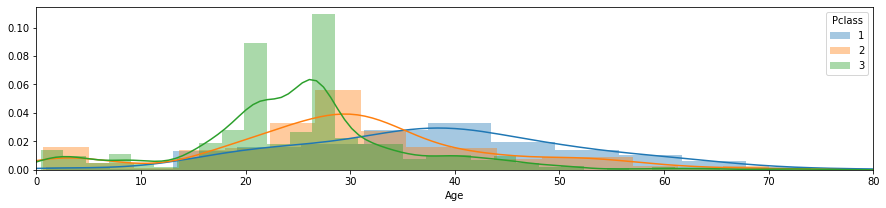

In [49]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,3))
for pclass, grouped in data.groupby('Pclass'):
    sns.distplot(grouped['Age'], label=pclass)
plt.xlim(0,max(data['Age']))
plt.legend(title='Pclass')
plt.show()

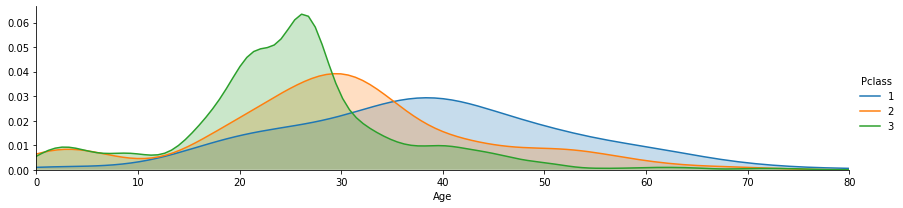

In [50]:
fig = sns.FacetGrid(data,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
fig.set(xlim=(0,data['Age'].max()))
fig.add_legend()

## Male/Female Distribution

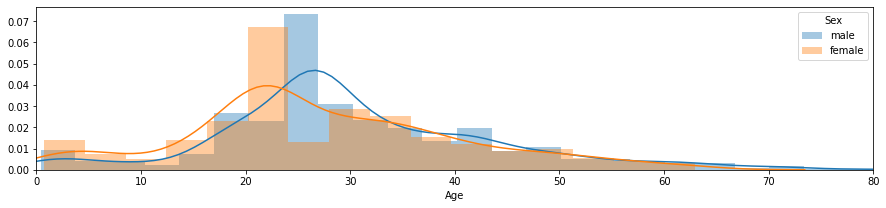

In [51]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,3))
for sex, grouped in sorted(data.groupby('Sex'), reverse=True):
    sns.distplot(grouped['Age'], label=sex)
plt.xlim(0,max(data['Age']))
plt.legend(title='Sex')
plt.show()

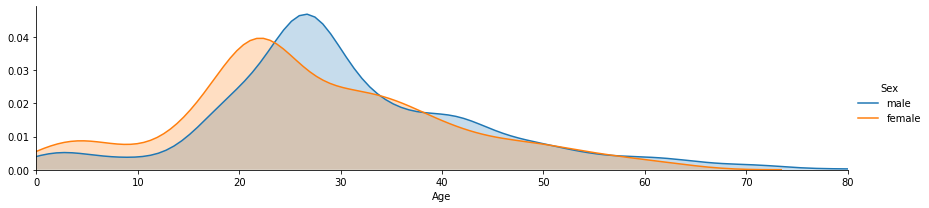

In [52]:
fig = sns.FacetGrid(data,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
fig.set(xlim=(0,data['Age'].max()))
fig.add_legend()

## Cabin Level Distribution

Text(0.5, 0, 'cabinLevel')

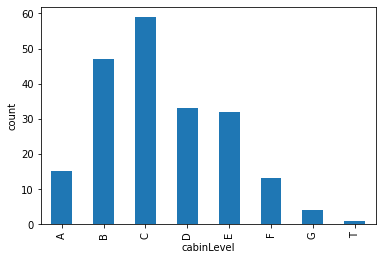

In [53]:
from matplotlib import pyplot as plt
data.loc[data.cabinLevel!='Z', 'cabinLevel'].value_counts().sort_index().plot.bar()
plt.ylabel('count')
plt.xlabel('cabinLevel')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


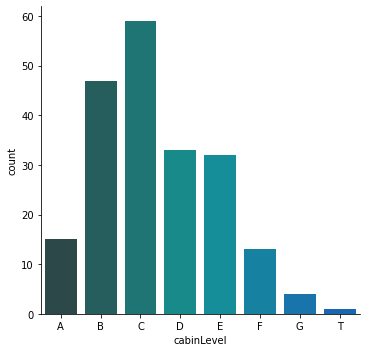

In [54]:
import seaborn as sns
sns.catplot('cabinLevel', data=data.sort_values('cabinLevel')[data.cabinLevel!='Z'], palette='winter_d', kind='count')

## Cabin Level Distribution vs Passenger Class

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


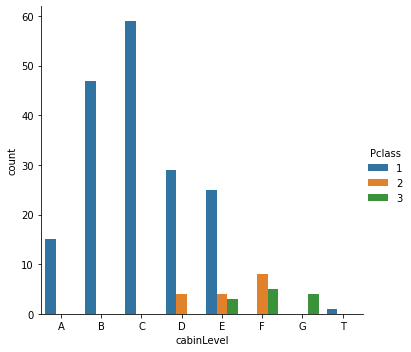

In [55]:
import seaborn as sns
sns.catplot(
    'cabinLevel',
    data=data.sort_values('cabinLevel')[data.cabinLevel!='Z'],
    hue='Pclass',
    kind='count'
)

## Embarked vs Passenger Class

(C = Cherbourg; Q = Queenstown; S = Southampton)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


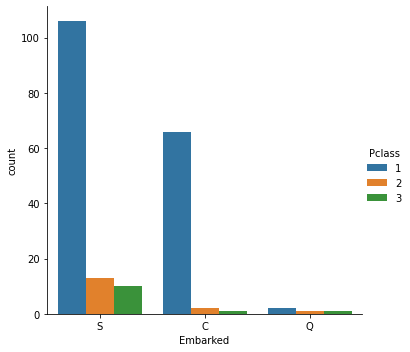

In [56]:
import seaborn as sns
sns.catplot(
    'Embarked',
    data=data.sort_values('cabinLevel')[data.cabinLevel!='Z'],
    hue='Pclass',
    kind='count'
)

## Family vs Alone?

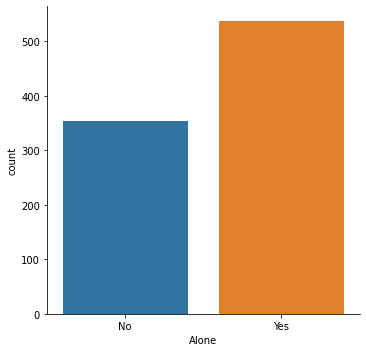

In [57]:
import seaborn as sns
sns.catplot(
    'Alone',
    data=data,
    kind='count'
)

## What factors helped someone survive the sinking?

### Passenger Class

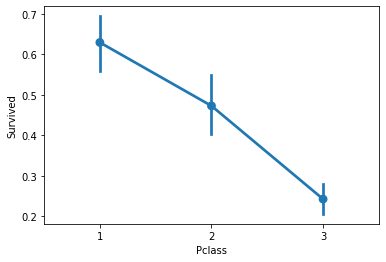

In [58]:
import seaborn as sns
sns.pointplot('Pclass', 'Survived', data=data)

### Passenger Class vs Age group

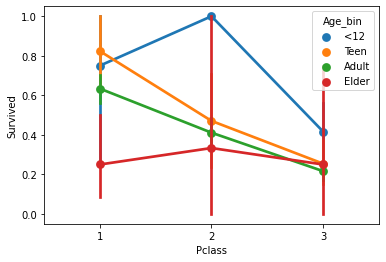

In [59]:
import seaborn as sns
sns.pointplot('Pclass', 'Survived', hue='Age_bin', data=data)

### Age

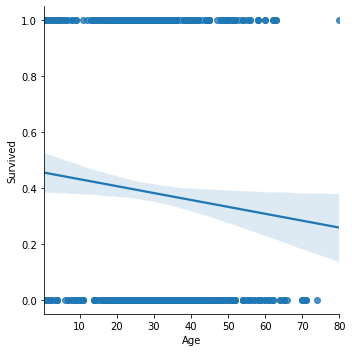

In [60]:
import seaborn as sns
sns.lmplot('Age', 'Survived', data=data)

### Age vs Passenger Class

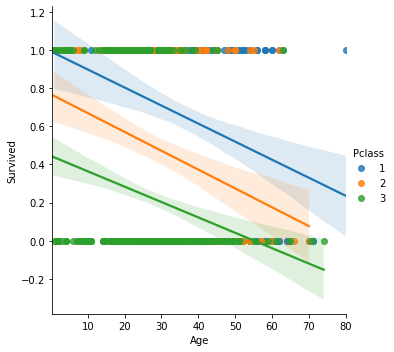

In [61]:
import seaborn as sns
sns.lmplot('Age', 'Survived', hue='Pclass', data=data)

### Alone

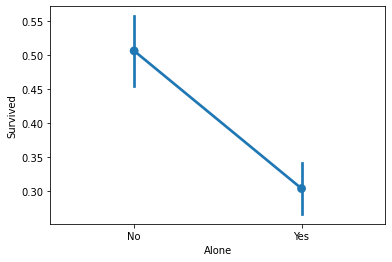

In [62]:
sns.pointplot('Alone', 'Survived', data=data)